---
# **Model Giving good Stats - Use this one for the project**
Add comments and explanation texts, clean the code, perharps use another notebook for the end result model
---


In [1]:
pip install --upgrade pandas pip install --upgrade pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [4]:
import pandas as pd

In [38]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

In [39]:
#df = pd.read_csv("BTC-USD.csv")
#df.head()

# Data2 Getting Yahoo Finance from pdr = data from 2020 afterwards
df = pdr.get_data_yahoo('BTC-USD')

In [40]:
df.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [41]:
# For Data2 - Transforming the index in a Date columns
df=df.reset_index()

In [42]:
df["Date"] = pd.to_datetime(df["Date"])
df.tail()

,Date,Close
1821,2022-04-26,38117.460938
1822,2022-04-27,39241.121094
1823,2022-04-28,39773.828125
1824,2022-04-29,38609.824219
1825,2022-04-30,38510.917969


In [43]:
HORIZON = 10

model = ExponentialSmoothing(endog = df['Close'])
results = model.fit()

preds = results.get_forecast(steps=HORIZON)

preds.summary_frame(alpha=0.2).head()

Close,mean,mean_se,mean_ci_lower,mean_ci_upper
1826,38514.265608,978.962416,37259.674791,39768.856426
1827,38514.265608,1366.586503,36762.914536,40265.616681
1828,38514.265608,1666.358284,36378.741541,40649.789676
1829,38514.265608,1919.880514,36053.839730,40974.691487
1830,38514.265608,2143.626004,35767.098347,41261.432870


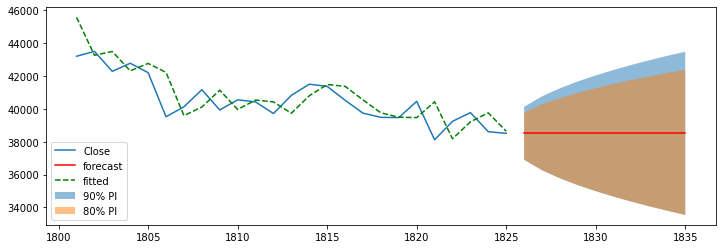

In [44]:
ax = df['Close'].iloc[-25:].plot(figsize=(12,4))
forecast_80 = preds.summary_frame(alpha=0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_90 = preds.summary_frame(alpha=0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]

ax.fill_between(forecast_90.index, forecast_90['mean_ci_lower'], forecast_90['mean_ci_upper'], alpha=0.5, label='90% PI')
ax.fill_between(forecast_80.index, forecast_90['mean_ci_lower'], forecast_80['mean_ci_upper'], alpha=0.5, label='80% PI')

forecast_80['mean'].iloc[-25:].plot(ax=ax, label='forecast', color='red')

results.fittedvalues.iloc[-25:].plot(ax=ax, label='fitted', color='green', linestyle='--')

ax.legend(loc=3)

Statistical model

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Exponential Smoothing Results                         
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1826
Model:                   ETS(A, N, N)   Log Likelihood              -15165.715
Date:                Sat, 30 Apr 2022   AIC                          30337.430
Time:                        17:08:46   BIC                          30353.959
Sample:                             0   HQIC                         30343.527
                               - 1826   Scale                       958363.646
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9740      0.015     66.487      0.000       0.945       1.003
initial_level    1421.6000   4.14e-13   3.43e+15      0.000    1421.600    1421.600
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8925.17
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              13.83   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

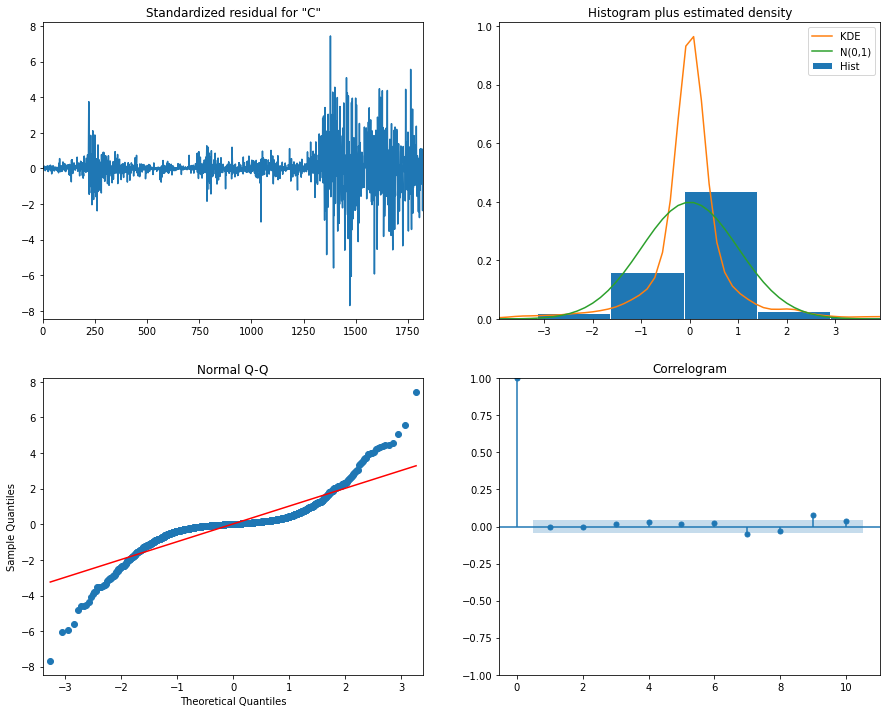

In [14]:
# Diagnosing the model residuals
results.plot_diagnostics(figsize = (15, 12))
plt.show()

In [15]:
# Divide into train and validation set to calculate R-squared score
train = df[:int(0.85 * (len(df)))]
test  = df[int(0.85 * (len(df))):]

train.shape, test.shape

((1552, 2), (274, 2))

In [16]:
start = len(train)
end   = len(train) + len(test) - 1
predictions = results.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('Simple Exponential Smoothing Predictions')
print(predictions)

1552    42177.592946
1553    41640.538799
1554    40018.222875
1555    39223.179111
1556    38180.819507
            ...     
1821    40432.598000
1822    38177.684513
1823    39213.457957
1824    39759.251236
1825    38639.724222
Name: Simple Exponential Smoothing Predictions, Length: 274, dtype: float64


In [17]:
# Create a dataframe to store r2 score
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Close'], predictions)}, index = [0])

# Display the results
evaluation_results

,r2_score
0,0.957877


# Function to train the model, request external API and come up with an "advice"

The function below will perform the following tasks:
*  Train the model once a day
*  Define the absolute median of the trained data
*  HTTP request to find the real time of the crypto
*  According to the position of real-time value in comparison with the median, return an statistical advice



# Dashboard

In [18]:
pip install explainerdashboard

Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.model_selection import train_test_split

In [46]:
array = df.values
X = array[:100]
y = array[-100:]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)